[Link to colab](https://colab.research.google.com/github/lsmin0152/cheb301/blob/main/notebooks/CHEB301_F25_17_Tokenization_OHE.ipynb)
## Tokenization and One-Hot Encoding


In [11]:
import numpy as np

molS = ['N#N','O=O','[HH]','[He]','C','C(=O)=O']

# Let's determine our vocabulary over the set provided
# this code does not work for parsing SMILES, in general
# We just want to keep things simples

vocab = set()
M = 0
for mol in molS:
    mol = list(mol)
    if len(mol) > M:
        M = len(mol)
    while mol:
        v = mol.pop()
        if v not in vocab:
            vocab.add(v)

print(vocab)

{')', 'O', 'e', 'H', 'N', '=', 'C', ']', '#', '[', '('}


In [3]:

# We will create a mapping dictionary that 
# points each character to a one-hot vector
N = len(vocab)
IN = np.eye(N)
charMap = {}
for i,c in enumerate(sorted(list(vocab))):
    charMap[c] = IN[i,:]

print(charMap)


{'#': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), '(': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), ')': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), '=': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), 'C': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), 'H': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), 'N': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), 'O': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), '[': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), ']': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), 'e': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}


In [6]:

# Function that takes a SMILES string and returns a (padded) array with OHE vectors as indicated by CMap
# M - dimension to pad to if necessary
# N - dimension of OHE
def Smi2Arr(SmiStr, CMap, M, N):
    Arr = np.zeros([M,N])
    for i,c in enumerate(list(SmiStr)):
        Arr[i,:] = CMap[c][:]
    return Arr

featArr = []
for mol in molS:
    featArr.append(Smi2Arr(mol, charMap, M, N))

print(featArr[0]) # N#N
print(featArr[1]) # O=O

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


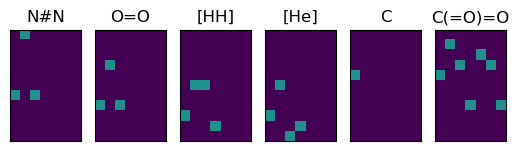

In [9]:
# Visualize the encodings
import matplotlib.pyplot as plt

def make_plot(ax, mol, Arr):
    ax.imshow(Arr.T, vmin=0, vmax=2)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set_title(mol)
    plt.grid(True, which='minor', color='w')

fig, axs = plt.subplots(1,len(molS))

for i, (mol,Arr) in enumerate(zip(molS,featArr)):
    make_plot(axs[i], mol, Arr)


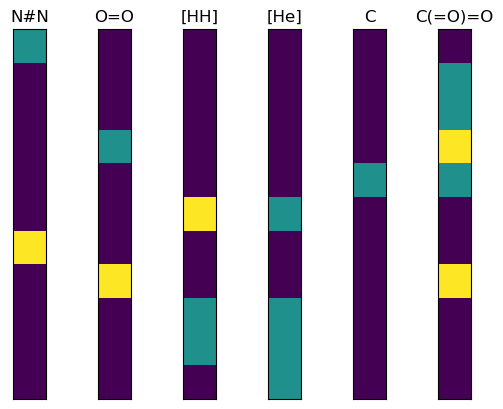

In [10]:

# Generate compressed feature vectors

featVec = [np.sum(Arr, axis=0) for Arr in featArr]

fig, axs = plt.subplots(1,len(molS))

for i, (mol,Vec) in enumerate(zip(molS,featVec)):
    make_plot(axs[i], mol, Vec[:,np.newaxis].T)
